In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as skio
import json
import csv
import tensorflow as tf
from sklearn.model_selection import train_test_split
from enum import IntEnum

from MultiEarth import Sentinel1, Sentinel2, MultiEarth
from ETL import ETL, TrainingSet
from ETL import _floatvector_feature, _float_feature, _int64_feature, _bytes_feature, _dtype_feature

%matplotlib inline
%load_ext autoreload
%autoreload 2

2023-05-31 04:47:13.522440: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
imPath = {}
im = {}
#!ls /me2022

In [3]:
me = MultiEarth()
print(me.Examples())

268602


In [4]:
!head selected.csv

In [5]:
manifest = np.loadtxt("selected.csv", delimiter=",", skiprows=1, dtype=int)
print(manifest.shape[0],'Training examples')

191907 Training examples


Shape: 256,256,2
Mean: -11.453644 Std: 4.484002
idxS2 < N = 0 < 3 = 1
Sentinel1 plot VH for example 2036


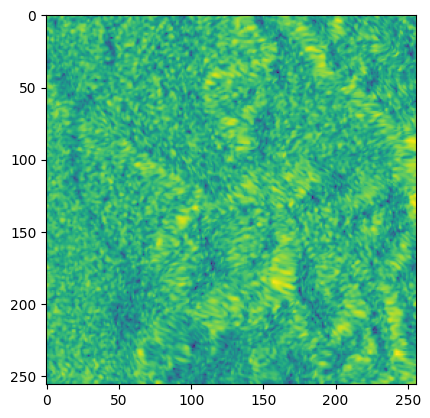

In [6]:
ex = 1000
idxS1 = manifest[ex][0]
idxS2 = manifest[ex][1]
sent1, sent2, nSent2 = me.SampleSet(idxS1)
sent1.Statistics()
sent1.Histogram(bins=10)
print('idxS2 < N = %d < %d = %d' %(idxS2, nSent2, idxS2<nSent2))
print('Sentinel1 plot VH for example %d' % (idxS1))
sent1.Plot(0)

Sentinel1 plot VV for example 2036


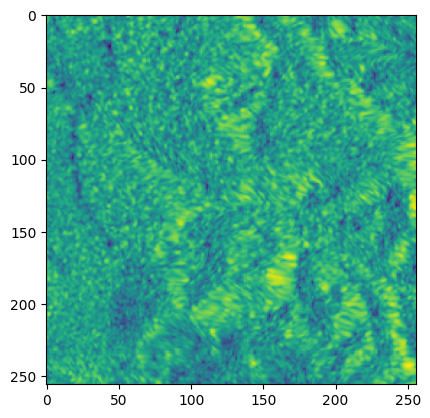

In [7]:
print('Sentinel1 plot VV for example %d' % (idxS1))
sent1.Plot(1)

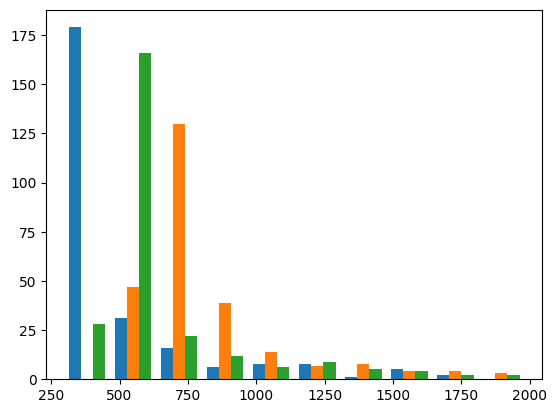

In [8]:
sent2[idxS2].Statistics()
sent2[idxS2].Histogram(bins=10)


In [9]:
if False:
  print('Sentinel2 example %d sample %d' % (idxS1, idxS2))
  print('  plot B4/red')
  sent2[idxS2].Plot(0)
  print('  plot B3/green')
  sent2[idxS2].Plot(1)
  print('  plot B2/blue')
  sent2[idxS2].Plot(2)

  plot RGB


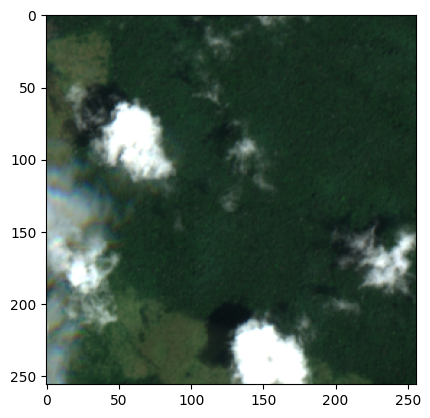

In [10]:
print('  plot RGB')
sent2[idxS2].Plot()

In [11]:
sent1.Crop(cropsize=32)
sent2[idxS2].Crop(cropsize=32)

crop 0 last bin 0.36583409875752654 next bin 0.3370982084206007 tail 0


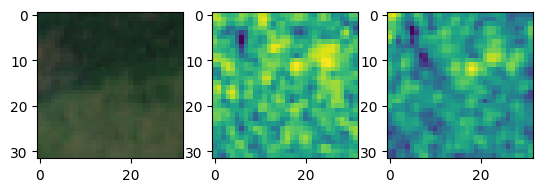

crop 1 last bin 0.3372411730491426 next bin 0.3102780441061365 tail 0


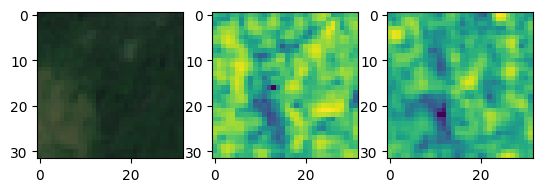

crop 2 last bin 0.2846301897457161 next bin 0.263099716687303 tail 0


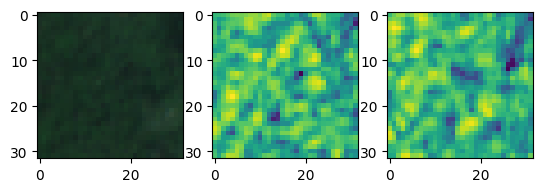

crop 3 last bin 0.5408228040928362 next bin 0.49327276863979375 tail 17
crop 4 last bin 0.5471132477486808 next bin 0.4998491415527221 tail 96
crop 5 last bin 0.5534036914045252 next bin 0.5051102398830647 tail 17
crop 6 last bin 0.24717345706773314 next bin 0.2287882058372423 tail 0


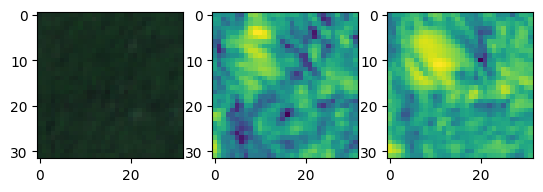

crop 7 last bin 0.2554654055231645 next bin 0.23630814529854727 tail 0


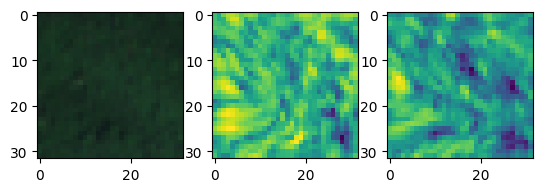

crop 8 last bin 0.6185955620196405 next bin 0.5634112154024595 tail 168
crop 9 last bin 1.0 next bin 0.9047308906366129 tail 116
crop 10 last bin 0.5259544827244765 next bin 0.479519571374061 tail 4


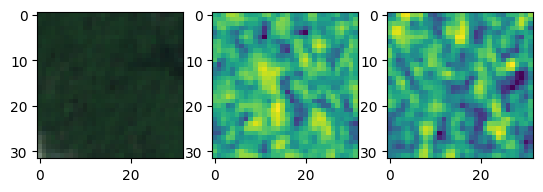

crop 11 last bin 0.47334349942105014 next bin 0.4319695359210186 tail 5


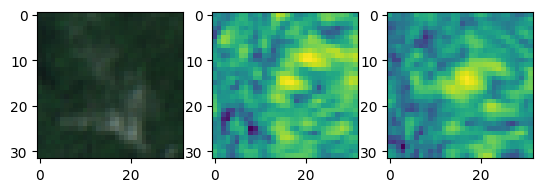

crop 12 last bin 0.2323051356993735 next bin 0.21583561049134437 tail 0


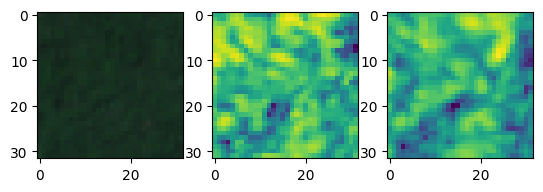

crop 13 last bin 0.23859557935521797 next bin 0.22149700978160441 tail 0


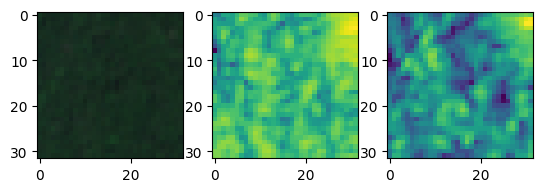

crop 14 last bin 0.23659407455563108 next bin 0.21938113327918396 tail 0


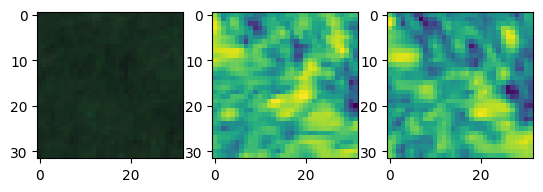

crop 15 last bin 0.24345637672564324 next bin 0.2253856476779446 tail 0


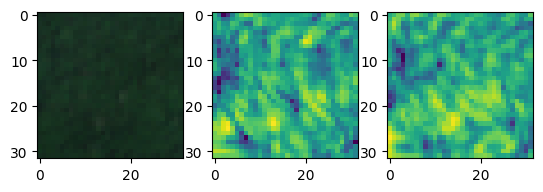

crop 16 last bin 0.46705305576520567 next bin 0.4260793932250915 tail 9


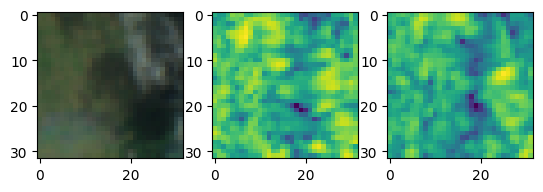

crop 17 last bin 1.0 next bin 0.906303501550574 tail 2209
crop 18 last bin 1.0 next bin 0.9076759619845766 tail 1289
crop 19 last bin 0.38985215635256903 next bin 0.3558265747595921 tail 0


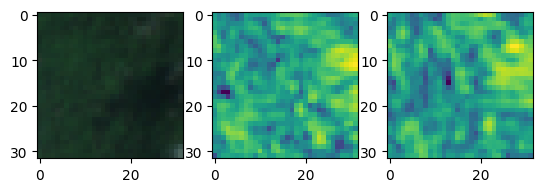

crop 20 last bin 0.7312516893106733 next bin 0.6652020309243064 tail 252
crop 21 last bin 0.24059708415480485 next bin 0.2232125853241074 tail 0


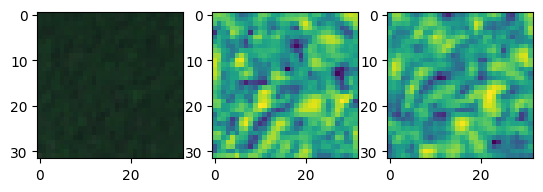

crop 22 last bin 0.23630814529854724 next bin 0.21969565546197617 tail 0


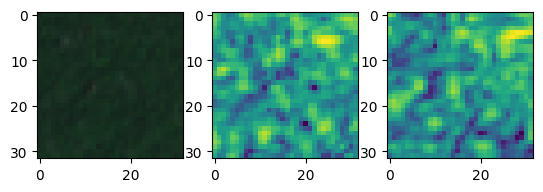

crop 23 last bin 0.23344885272770885 next bin 0.21554968123426052 tail 0


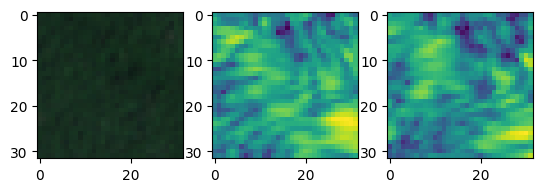

crop 24 last bin 0.794156125869118 next bin 0.7245323517692032 tail 954
crop 25 last bin 1.0 next bin 0.9101063606697892 tail 782
crop 26 last bin 1.0 next bin 0.9083621922015778 tail 1135
crop 27 last bin 0.36812153281419724 next bin 0.3375556952319348 tail 0


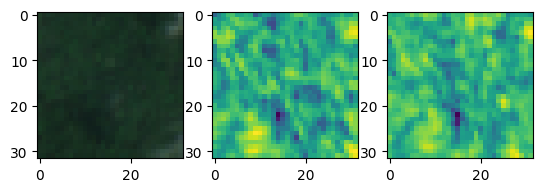

crop 28 last bin 0.5150891709552907 next bin 0.47179948143279743 tail 16
crop 29 last bin 0.24145487192605636 next bin 0.223183992398399 tail 0


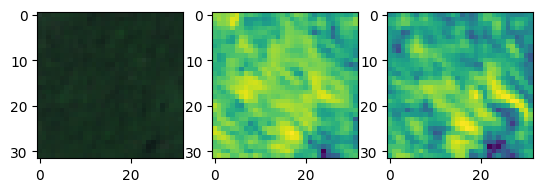

crop 30 last bin 0.30578895476992024 next bin 0.2823999415404622 tail 0


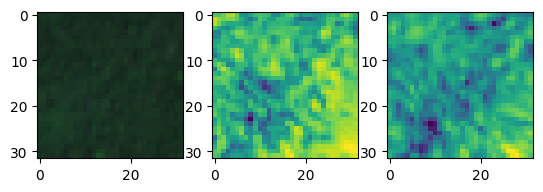

crop 31 last bin 0.23859557935521797 next bin 0.22138263807877084 tail 0


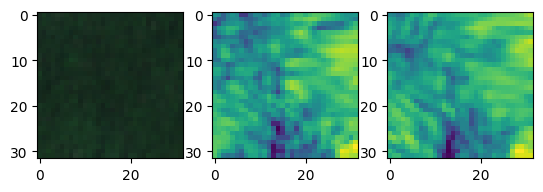

crop 32 last bin 0.973719699317769 next bin 0.9064691380516501 tail 2826
crop 33 last bin 0.7238175286264934 next bin 0.6596550033368798 tail 399
crop 34 last bin 0.2874894823165545 next bin 0.2647866993040977 tail 0


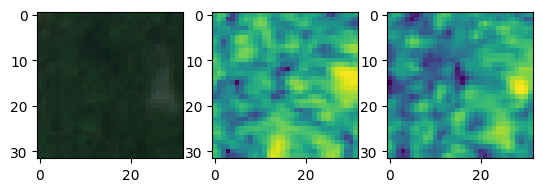

crop 35 last bin 0.41329835543344384 next bin 0.3784721719206322 tail 0


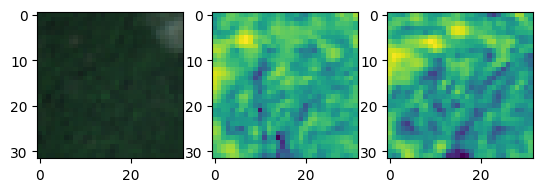

crop 36 last bin 0.340100465619981 next bin 0.3131373366769749 tail 0


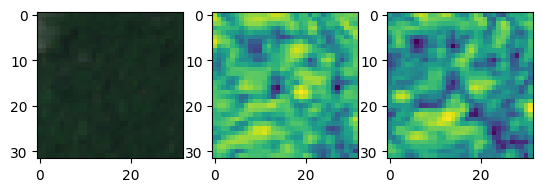

crop 37 last bin 0.2460297400393978 next bin 0.22707263029473923 tail 0


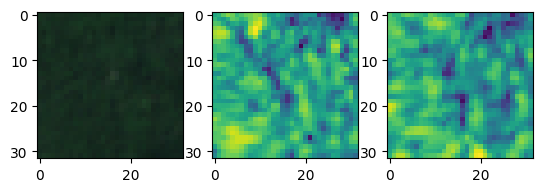

crop 38 last bin 0.6077302502504547 next bin 0.5518310804905641 tail 52
crop 39 last bin 1.0 next bin 0.9045307401566542 tail 280
crop 40 last bin 1.0 next bin 0.918283937422387 tail 2590
crop 41 last bin 1.0 next bin 0.9079047053902435 tail 804
crop 42 last bin 0.2606121321506736 next bin 0.24082582756047194 tail 0


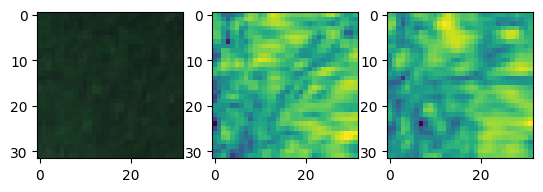

crop 43 last bin 0.2514623959239907 next bin 0.23250528617933217 tail 0


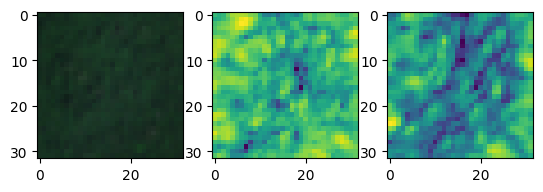

crop 44 last bin 0.2620417784360928 next bin 0.24285592528576716 tail 0


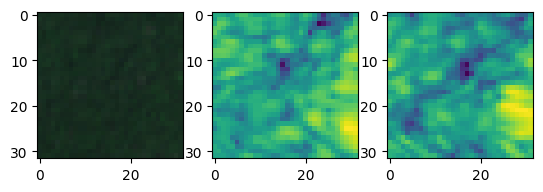

crop 45 last bin 0.23745186232688262 next bin 0.21909520402210014 tail 0


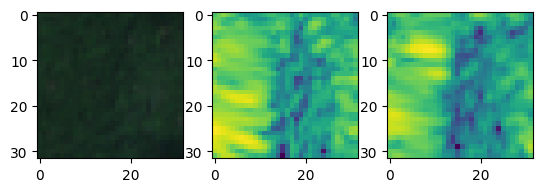

crop 46 last bin 0.6489040632705275 next bin 0.5896023353513392 tail 188
crop 47 last bin 1.0 next bin 0.9085623426815364 tail 1851
crop 48 last bin 0.8290394952333463 next bin 0.7596444645390985 tail 1954
crop 49 last bin 0.720958236055655 next bin 0.6612562071765493 tail 606
crop 50 last bin 0.38985215635256903 next bin 0.3577137078563455 tail 0


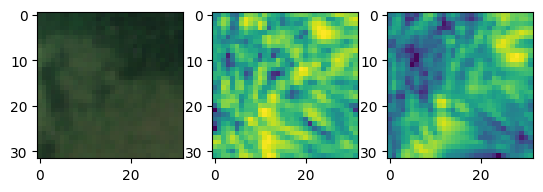

crop 51 last bin 0.3538250699600053 next bin 0.32168662146378174 tail 0


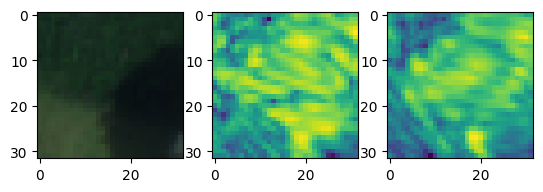

crop 52 last bin 1.0 next bin 0.9035013948311524 tail 889
crop 53 last bin 0.8530575528283888 next bin 0.7734262547305396 tail 59
crop 54 last bin 0.5047957177002724 next bin 0.4602193465209019 tail 22
crop 55 last bin 0.436172696000151 next bin 0.3985158128422093 tail 0


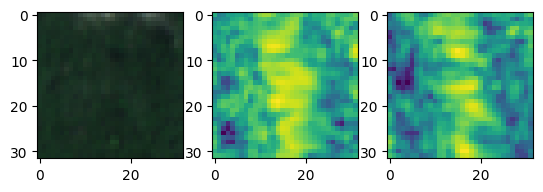

crop 56 last bin 0.717527084970649 next bin 0.6552802857034972 tail 1201
crop 57 last bin 0.34696276778999313 next bin 0.31968511666419486 tail 0


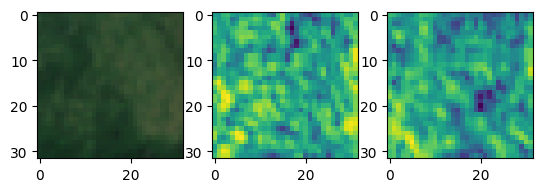

crop 58 last bin 0.3503939188749992 next bin 0.3232592323777429 tail 0


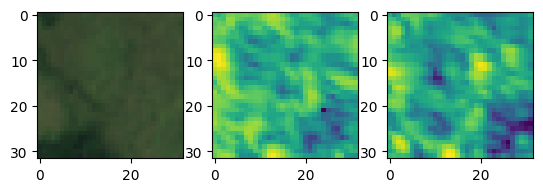

crop 59 last bin 0.41329835543344384 next bin 0.3775571982979639 tail 0


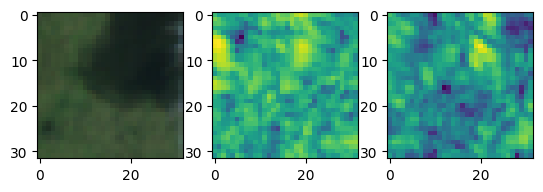

crop 60 last bin 1.0 next bin 0.9131372107948778 tail 2843
crop 61 last bin 1.0 next bin 0.9089626436414537 tail 1856
crop 62 last bin 0.3355255975066396 next bin 0.30847668978650833 tail 0


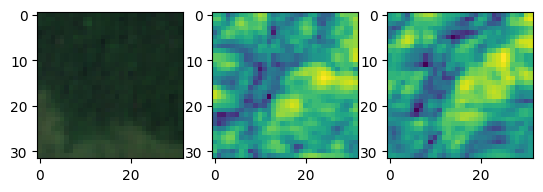

crop 63 last bin 0.2560372640373322 next bin 0.23616518067000536 tail 0


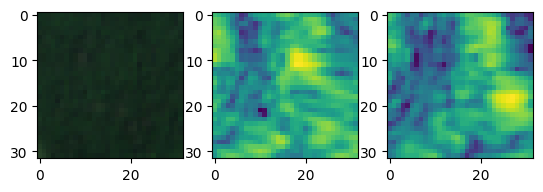

In [19]:
for c in range(sent2[idxS2].GetCrops()):
  img1 = sent1.GetCrop(crop=c)
  img2 = sent2[idxS2].GetCrop(crop=c)
  #avg, std, max, min = sent1.GetCropStats(crop=c)
  frq, bin_edges = np.histogram(img2)
  tail = sum(frq[bin_edges[:-1] > 0.4])
  print('crop', c, 'last bin', bin_edges[-1], 'next bin', bin_edges[-2], 'tail', tail)
  #if tail < 10:
  if bin_edges[-1] < 0.45:
    #plt.subplot(1, 3, 1)
    #plt.bar(bin_edges[:-1], frq, width=np.diff(bin_edges), edgecolor="black", align="edge")
    plt.subplot(1, 3, 1)
    plt.imshow(img2)
    plt.subplot(1, 3, 2)
    plt.imshow(img1[:,:,0])   
    plt.subplot(1, 3, 3)
    plt.imshow(img1[:,:,1])   
    plt.show()
  

mean -0.04867959 std 0.86707455


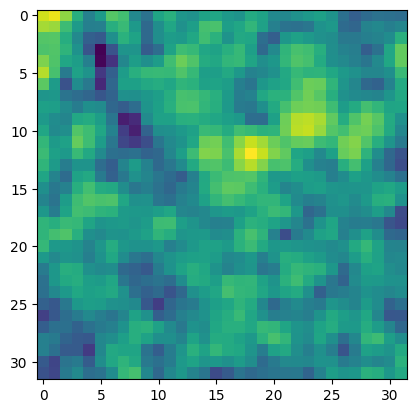

mean -0.12947333 std 0.97773516


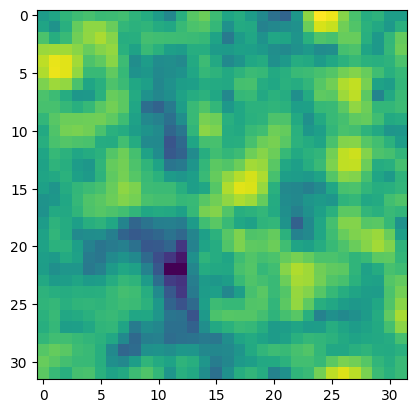

mean -0.092789695 std 1.0032794


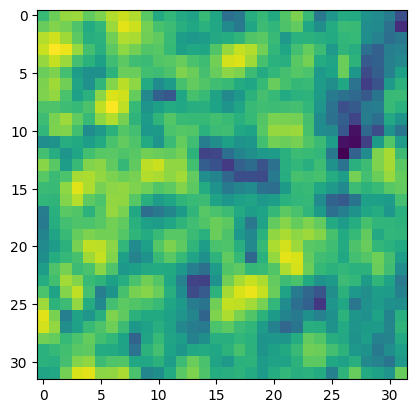

mean -0.015860274 std 0.9196621


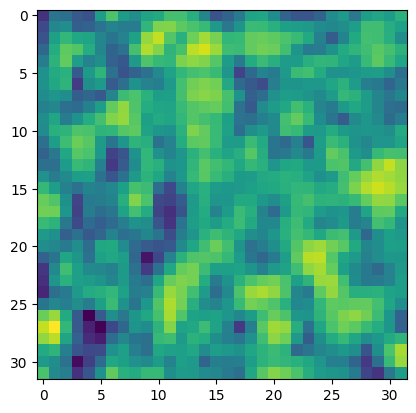

mean 0.3136904 std 1.0701327


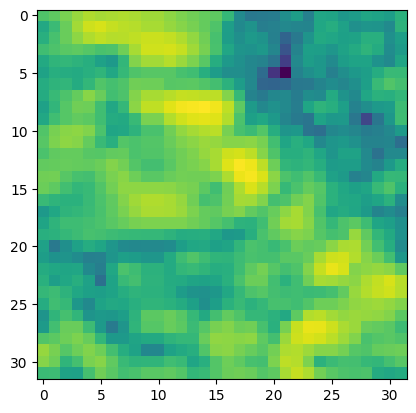

mean 0.14035884 std 1.0340899


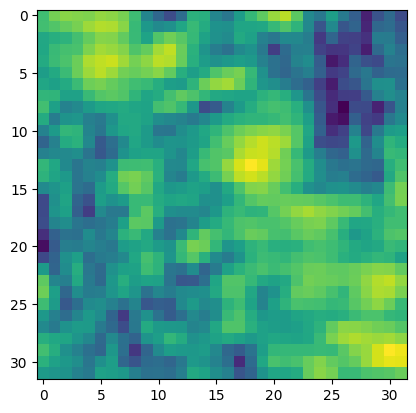

mean 0.02181615 std 1.0267253


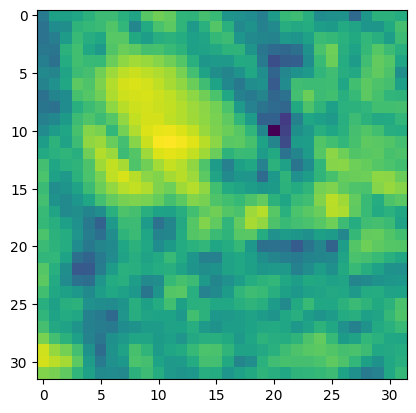

mean -0.18517843 std 0.9818764


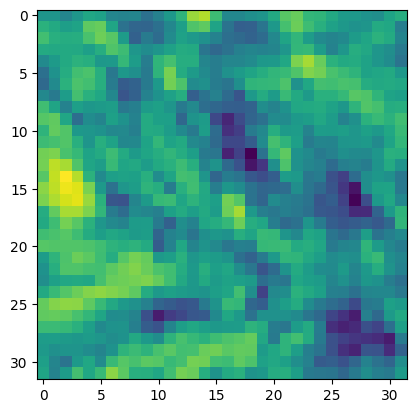

mean -0.28605574 std 0.90270567


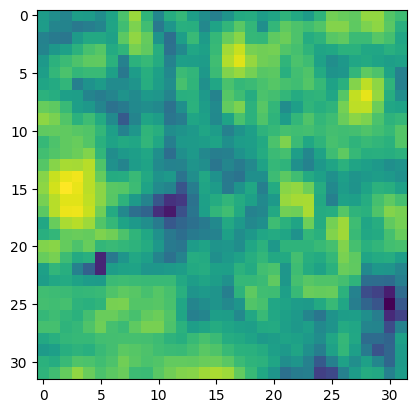

mean -0.09479593 std 0.9238431


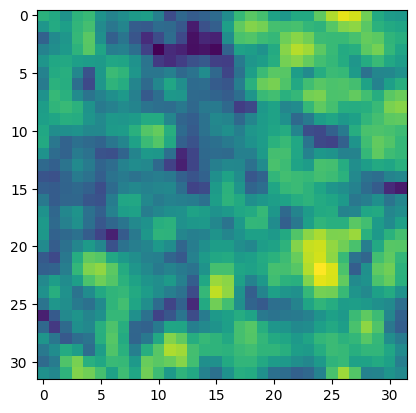

mean -0.12865451 std 0.94087046


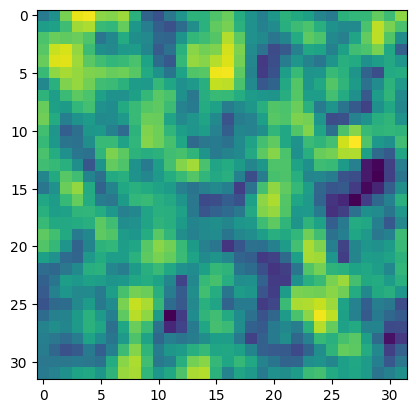

mean 0.22883172 std 1.0091777


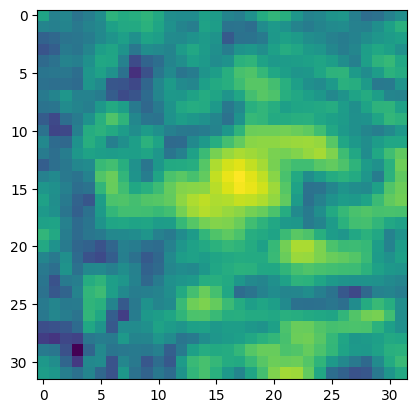

mean 0.12043019 std 0.9908295


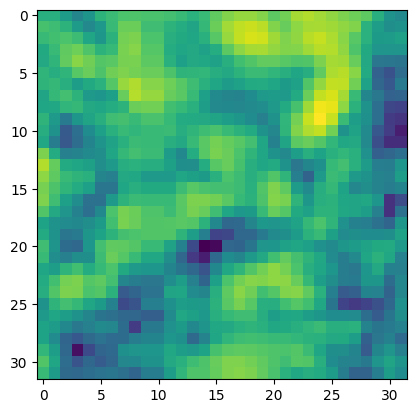

mean -0.046795174 std 1.0182812


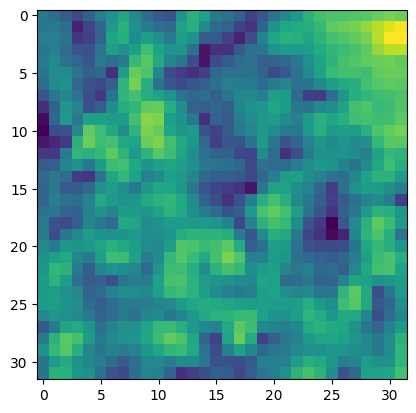

mean 0.1937487 std 1.0378753


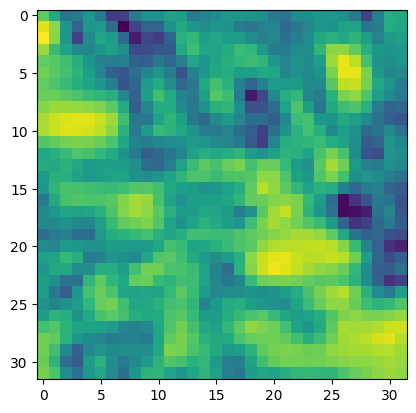

mean -0.25485602 std 0.9536505


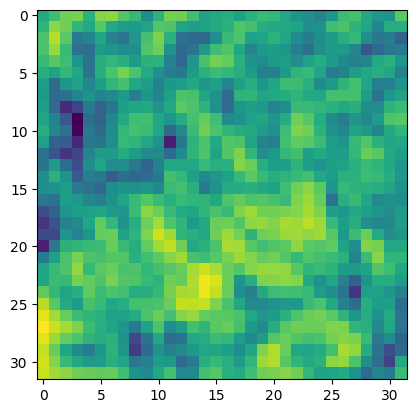

mean -0.057506427 std 0.88245654


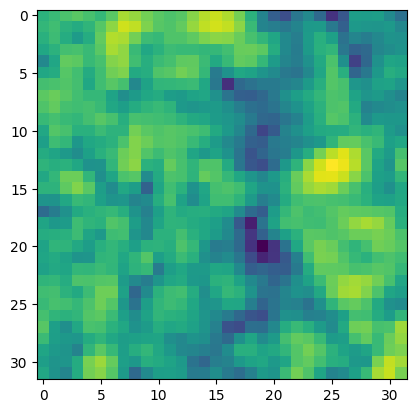

mean 0.051395953 std 0.92525446


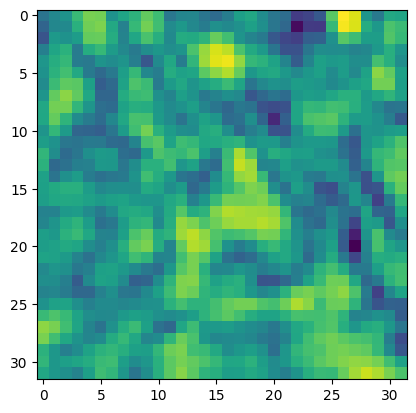

mean -0.16188587 std 0.91457015


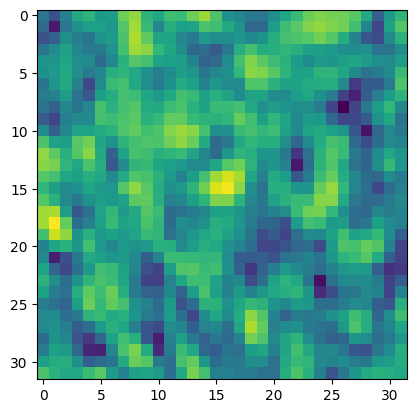

mean -0.0049445834 std 0.99380624


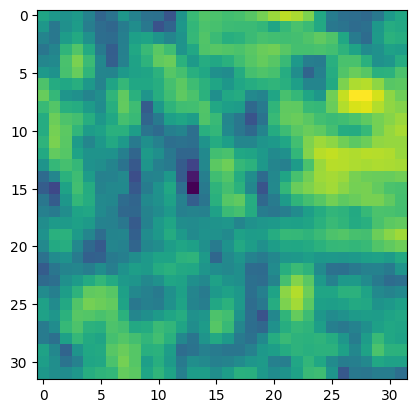

mean 0.042921394 std 1.1171308


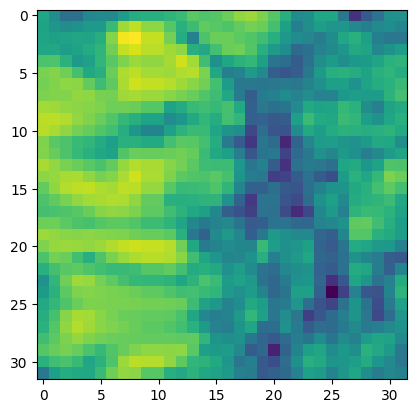

mean 0.037209105 std 0.90052766


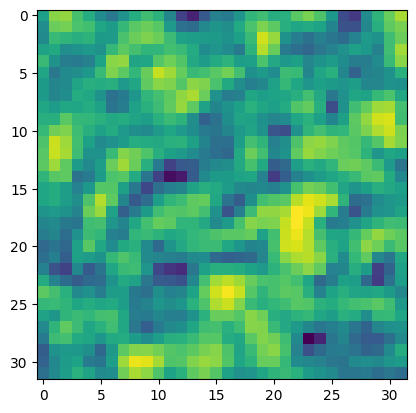

mean 0.021328986 std 0.92516243


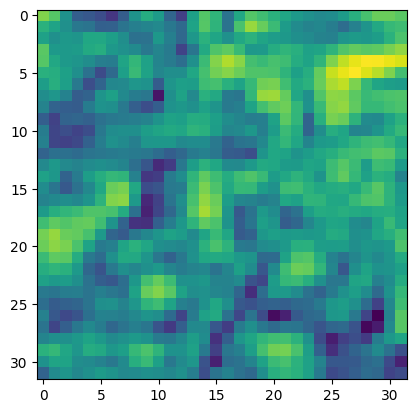

mean 0.34661254 std 0.98479074


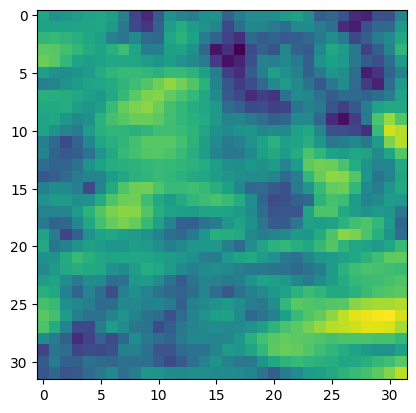

mean -0.22093162 std 0.8999902


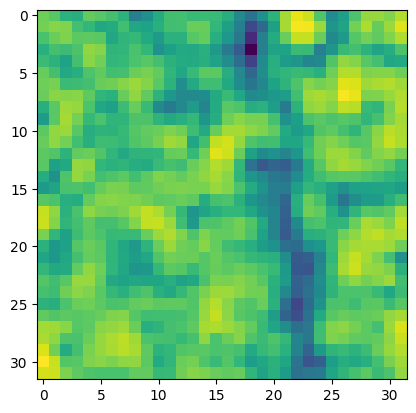

mean 0.043623272 std 0.9376589


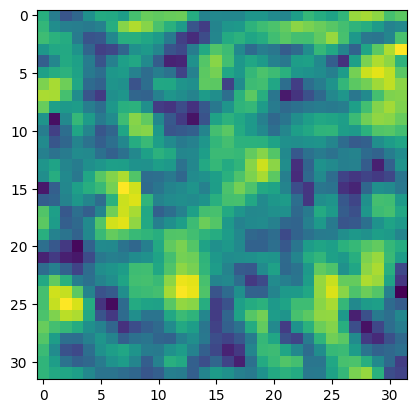

mean 0.19078241 std 0.91597235


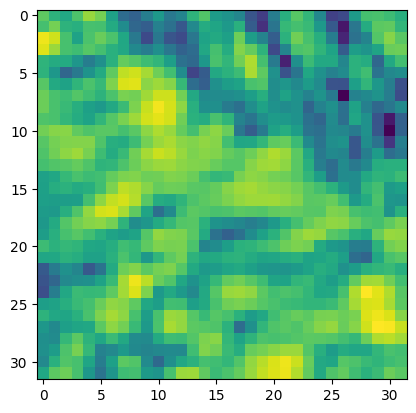

mean -0.12598562 std 0.970615


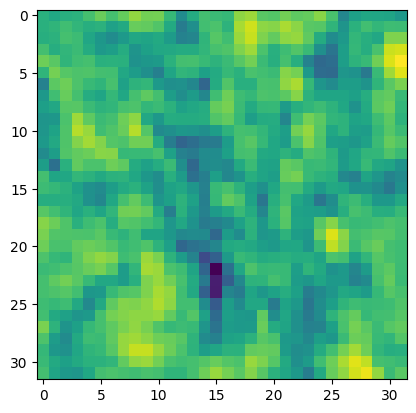

mean 0.19411996 std 0.9606622


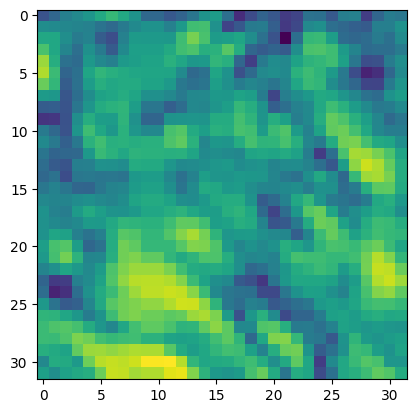

mean 0.27593902 std 0.98211783


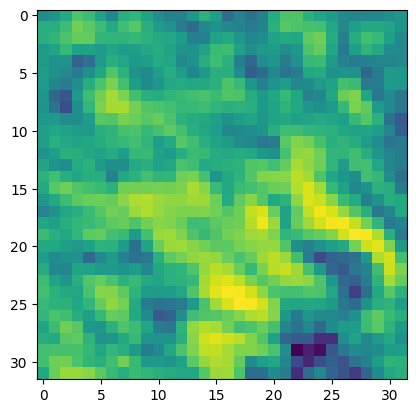

mean -0.18817857 std 0.9789987


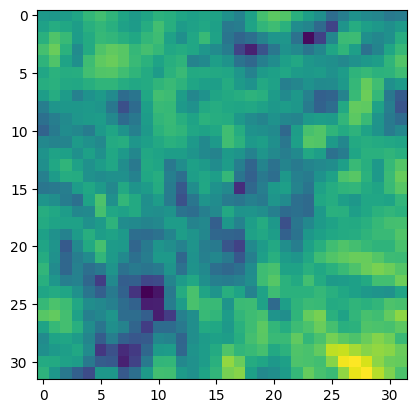

mean 0.2453706 std 1.0323534


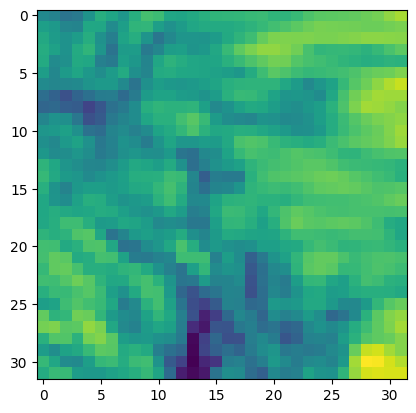

mean -0.09730766 std 0.8045941


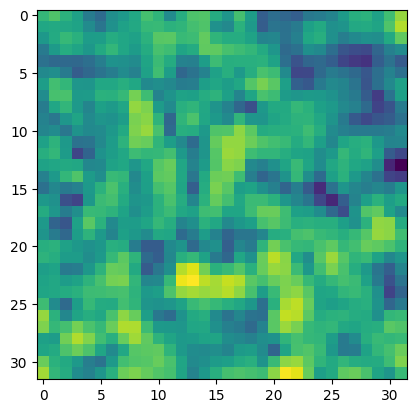

mean -0.10033278 std 0.9220842


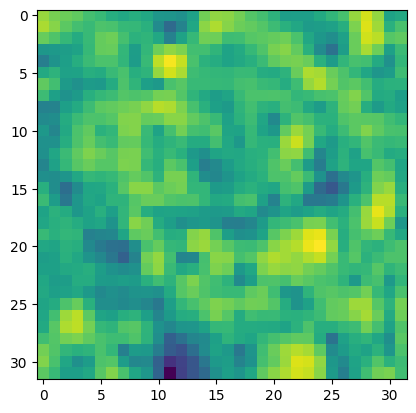

mean 0.23014519 std 1.0240924


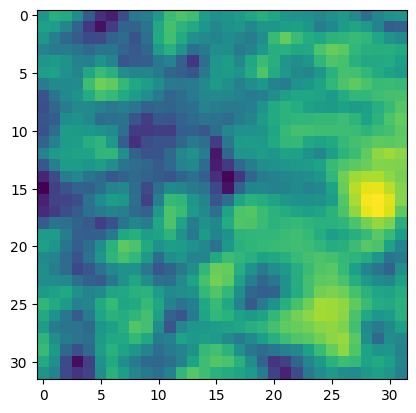

mean -0.009859525 std 0.9365106


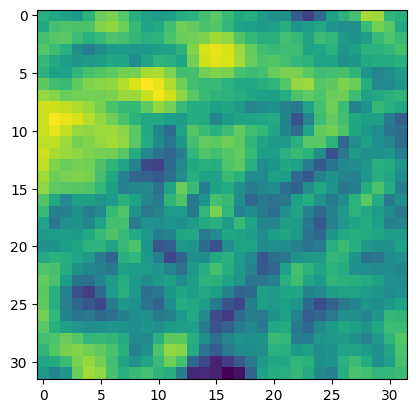

mean 0.12711069 std 0.9605012


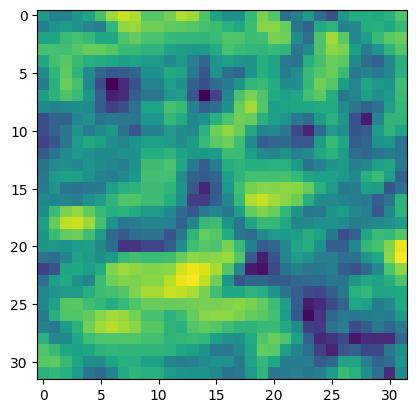

mean 0.15662734 std 0.9584247


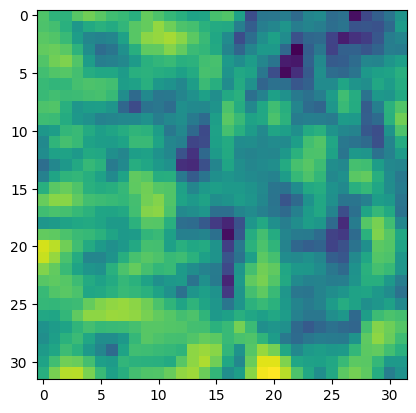

mean -0.041573077 std 0.9624048


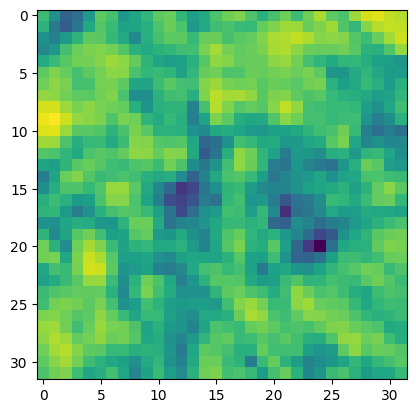

mean -0.11523378 std 1.0869019


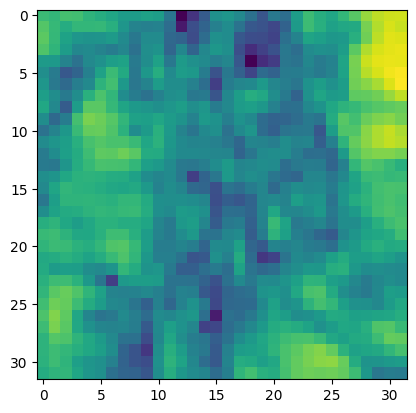

mean 0.06578209 std 0.84460187


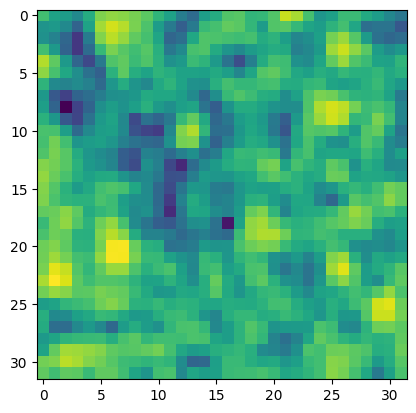

mean -0.2319111 std 0.9674289


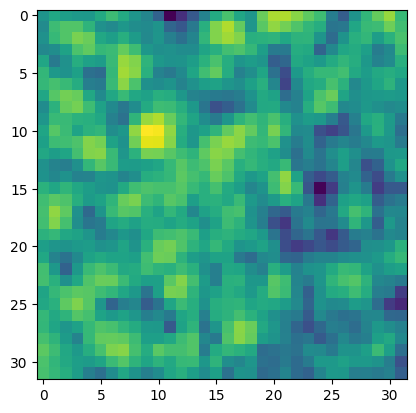

mean 0.046006188 std 0.95264435


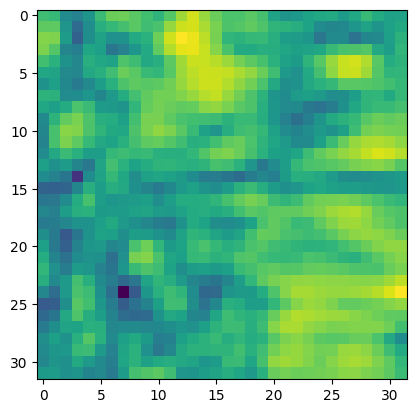

mean -0.23618308 std 1.0350199


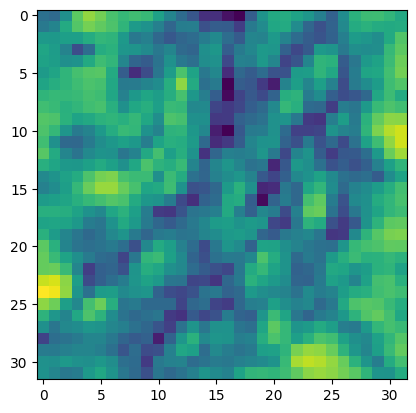

mean 0.3590553 std 0.97725046


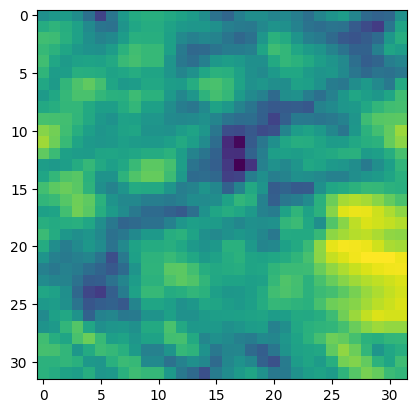

mean 0.26787293 std 1.1944985


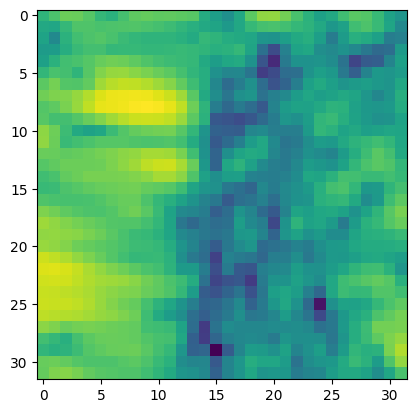

mean 0.175839 std 0.9488435


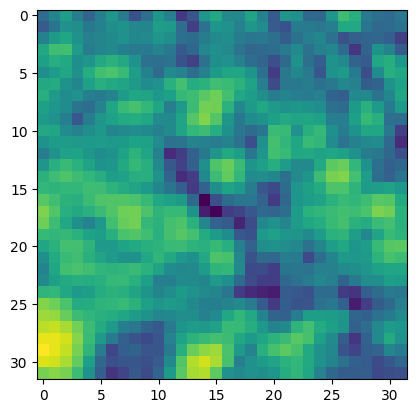

mean 0.007602766 std 1.0753077


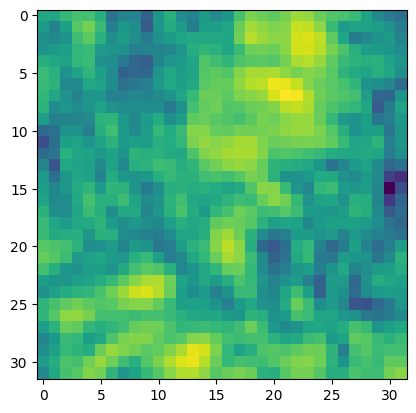

mean 0.06734037 std 0.8462124


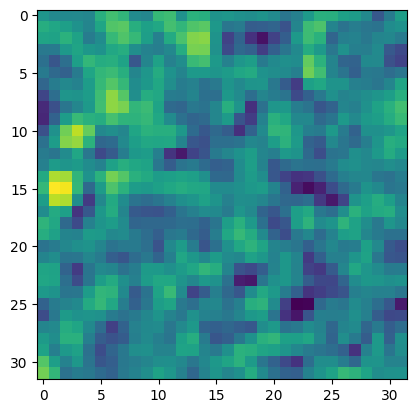

mean -0.59438133 std 0.96798134


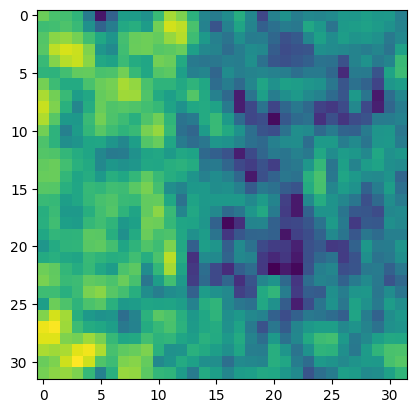

mean -0.07475569 std 0.9420421


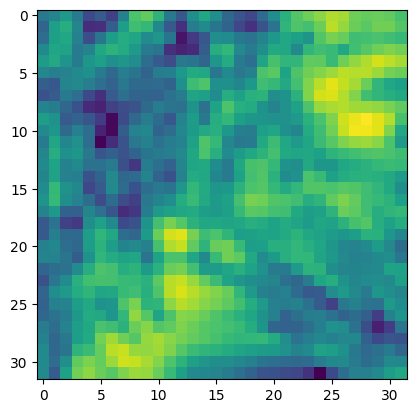

mean 0.2785601 std 1.0498197


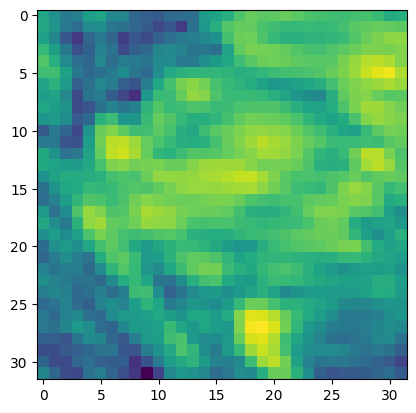

mean 0.1417314 std 0.9935119


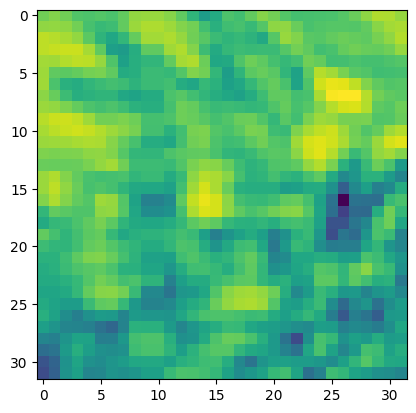

mean -0.12805094 std 1.0767164


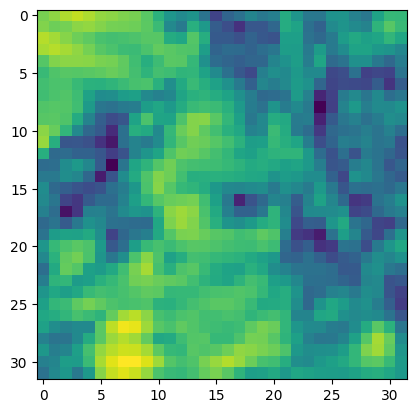

mean 0.27437672 std 1.056102


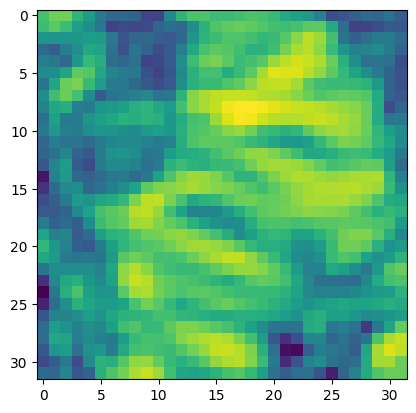

mean 0.051873296 std 1.1308275


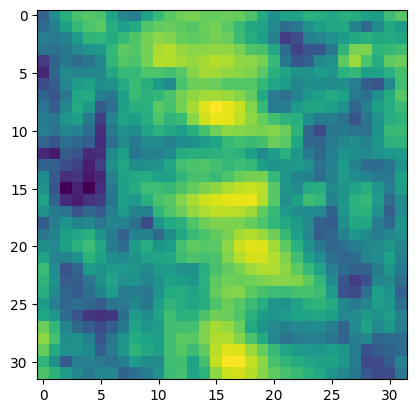

mean 0.1184833 std 0.8553488


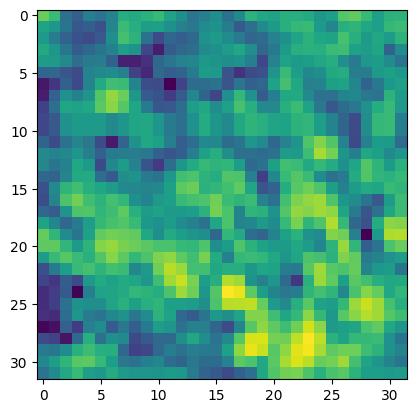

mean -0.067769065 std 0.8800102


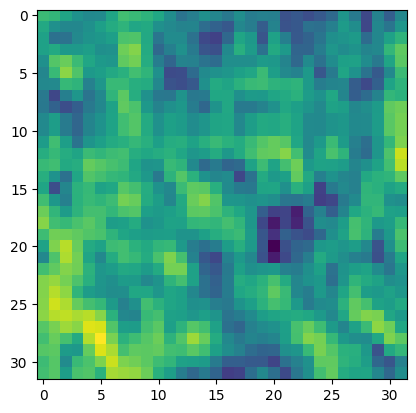

mean -0.09813447 std 0.991418


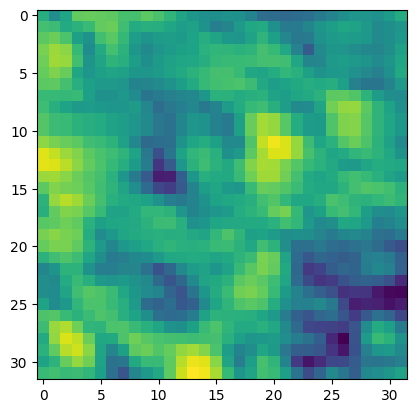

mean -0.6892145 std 0.9662901


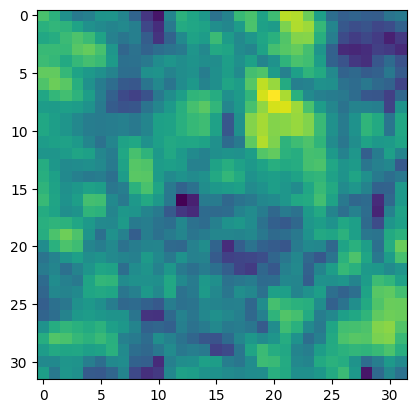

mean -0.26481408 std 0.9176703


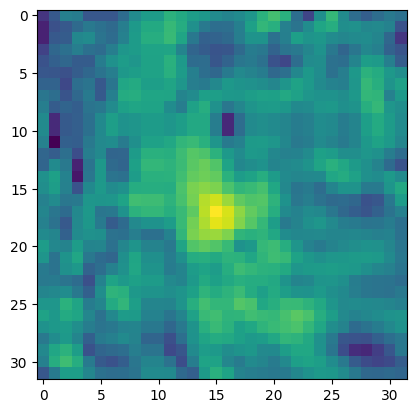

mean -0.30604428 std 0.9704684


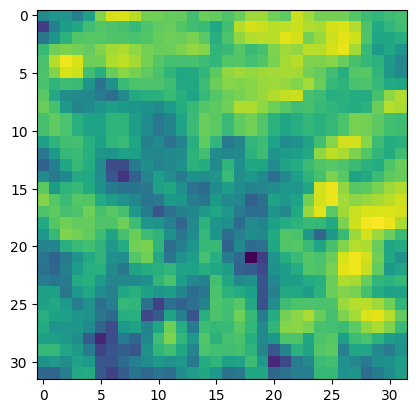

mean -0.06257331 std 1.0277361


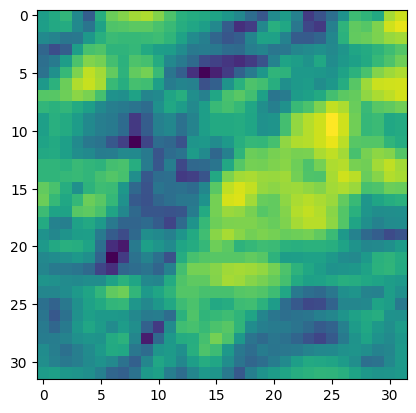

mean 0.32410502 std 1.1331443


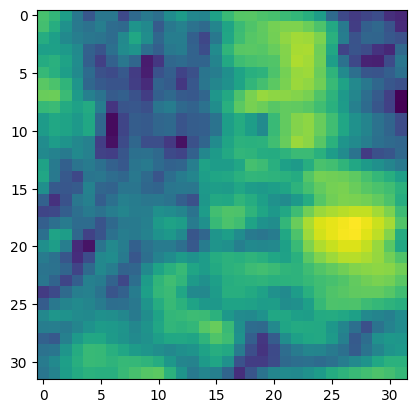

In [13]:
for c in range(sent1.GetCrops()):
  img = sent1.GetCrop(crop=c)
  avg, std, _, _ = sent1.GetCropStats(crop=c)
  print('mean', avg, 'std', std)
  plt.imshow(img[:,:,1])
  plt.show()

In [ ]:
img = sent2[idxS2].GetCrop(crop=1)

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
frq, bin_edges = np.histogram(img)

In [ ]:
frq

In [ ]:
bin_edges

In [ ]:
plt.bar(bin_edges[:-1], frq, width=np.diff(bin_edges), edgecolor="black", align="edge")